# 1. 시작하기

## 1-1. 데이터 불러오기

In [1]:
import pandas as pd

In [2]:
pima = pd.read_csv("/content/drive/MyDrive/diabetes.csv")

In [3]:
pima.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# 컬럼 이름 깔끔하게 정리
col_names = ['Pregnancy', 'Clucose', 'Blood Pressure', 'Skin Thickness', 'Insulin', 'BMI', 'Pedigree', 'Age', 'Outcome']

In [5]:
pima = pd.read_csv("/content/drive/MyDrive/diabetes.csv", names=col_names)
pima = pima.drop(index=[0], axis=0)

In [6]:
pima.head(5)

,Pregnancy,Clucose,Blood Pressure,Skin Thickness,Insulin,BMI,Pedigree,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1


## 1-2. 모듈 불러오기

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz # export_graphviz: 그래프 저장용 텍스트 파일 포맷인 .dot 파일을 만듦
from sklearn import metrics # for accuracy calculation

In [8]:
# 트리 시각화를 위한 모듈 import
!pip install pydot

import pydot
from IPython.core.display import Image 

## 1-3. train & test split

In [9]:
feature_cols = ['Pregnancy', 'Clucose', 'Blood Pressure', 'Skin Thickness', 'Insulin', 'BMI', 'Pedigree', 'Age']
print(feature_cols) # 독립변수 8개
print(pima.Outcome.unique()) # 종속변수는 2개의 class

['Pregnancy', 'Clucose', 'Blood Pressure', 'Skin Thickness', 'Insulin', 'BMI', 'Pedigree', 'Age']
['1' '0']


In [10]:
X = pima[feature_cols] # features
y = pima.Outcome # target variable

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) # 70% training, 30% test
# random_state를 고정하면 값 변화를 살펴보고 모델의 성능 개선에 대한 판단을 내릴 수 있음

# 2. Before Pruning

## 2-1. 트리 생성 & 적합

In [13]:
# Pruning 되기 전 
clf = DecisionTreeClassifier(random_state=0) # Decision Tree Classifer object 구축

# Train Decision Tree Classifer
tree_nottuned = clf.fit(X_train,y_train)

## 2-2. Not-tuned tree 시각화

In [14]:
# 트리 시각화 함수
def draw_decision_tree(clf, feature_names = None, class_names = None):
    dot_data = export_graphviz(clf, out_file = None, 
                                feature_names = feature_names,
                                class_names = class_names,
                                filled = True, 
                                rounded = True,
                                special_characters = True)
    graph = pydot.graph_from_dot_data(dot_data)[0]
    image = graph.create_png()
    return Image(image)

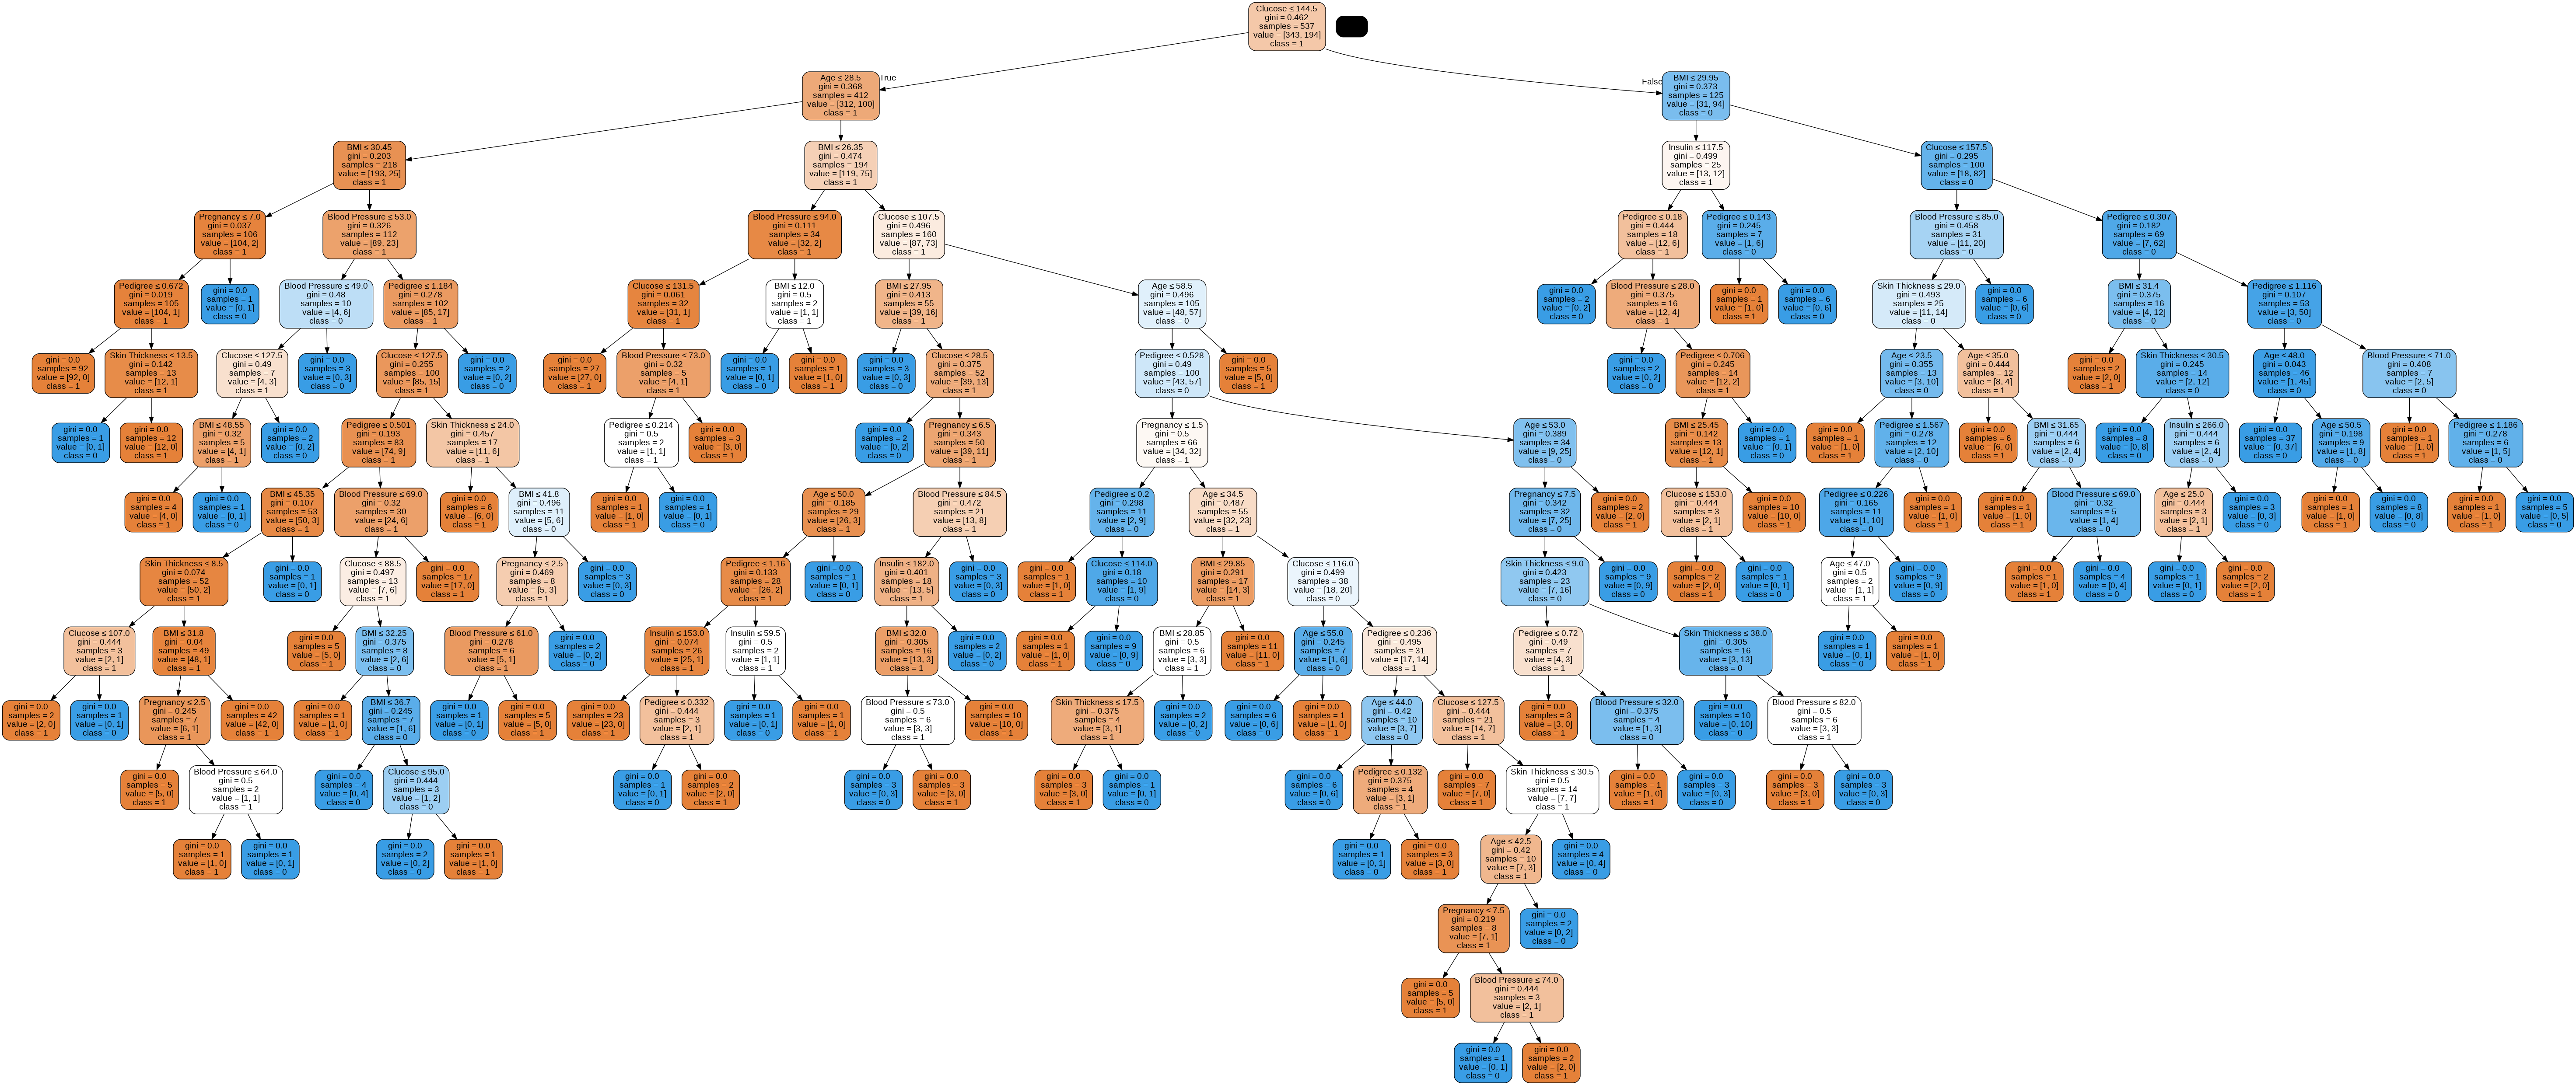

In [15]:
draw_decision_tree(tree_nottuned, feature_cols, pima.Outcome.unique())

- overfitting이 추정됨

## 2-3 Not-tuned tree Accuracy

In [17]:
# test dataset 예측하기
y_pred = clf.predict(X_test)

# Model Accuracy
# How often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7229437229437229


# 3. 사전 가지치기: parameter 임의로 설정

1. max_depth

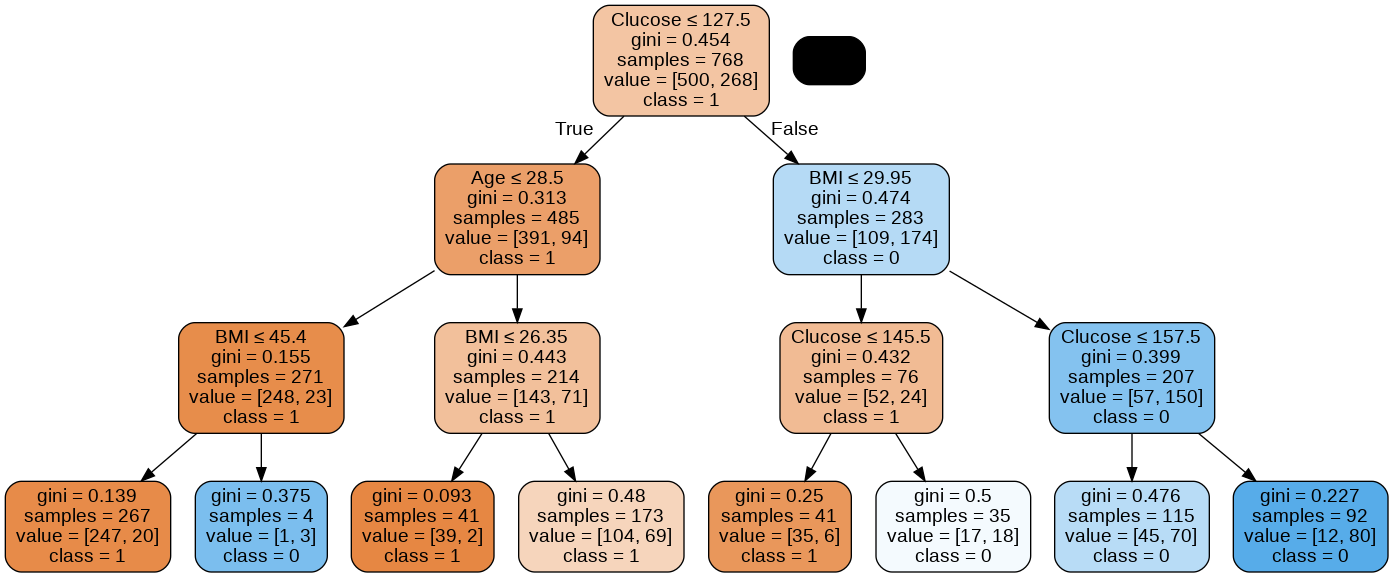

In [20]:
# 트리의 최대 depth를 결정
clf = DecisionTreeClassifier(max_depth = 3)
tree = clf.fit(X, y)
draw_decision_tree(tree, feature_cols, pima.Outcome.unique())

# max_depth 값을 입력하지 않을 경우, 모든 leaf가 pure해질때까지 혹은,
# 분기된 노드 속 샘플수가 설정한 최소 샘플수(min_samples_split)보다 적게 될때까지 분기함

2. min_samples_split

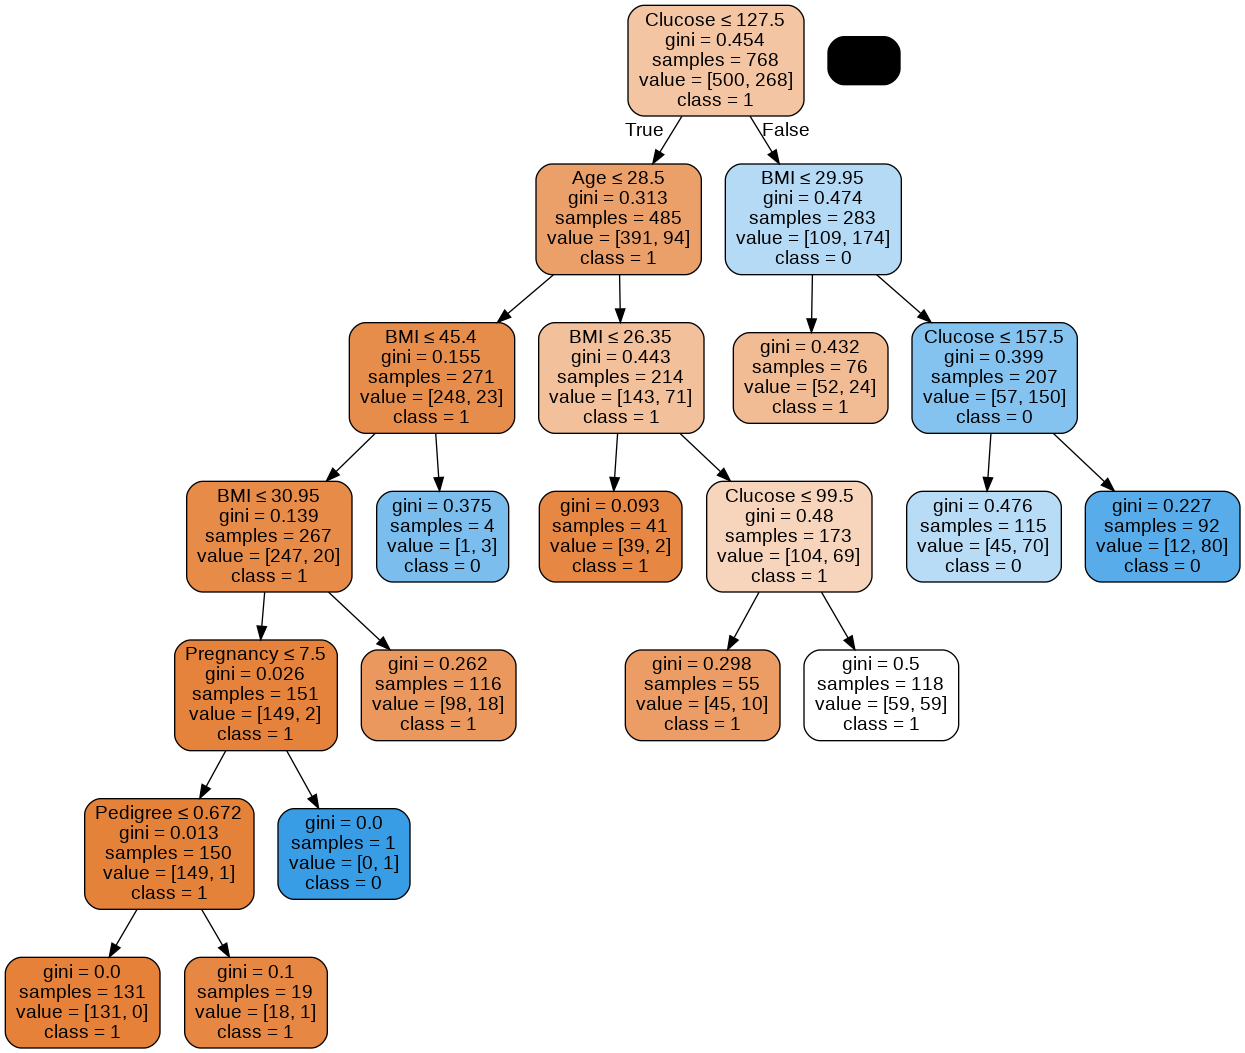

In [21]:
# split하기 위해 노드가 가지고 있어야 하는 최소 샘플 개수를 설정
clf = DecisionTreeClassifier(min_samples_split = 150)
tree = clf.fit(X, y)
draw_decision_tree(tree, feature_cols, pima.Outcome.unique())

# 최소 개수보다 node 내 샘플 수가 적으면 leaf가 pure하지 않더라도 분기를 멈춤
# float 입력 시, 전체 샘플 개수 대비 float 비율만큼의 개수로 최소 샘플수가 설정됨

3. min_samples_leaf

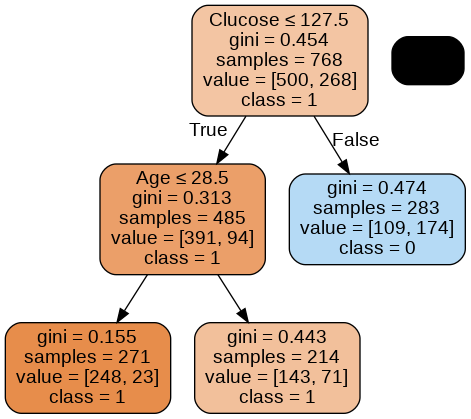

In [22]:
# leaf node가 가져야 하는 최소 샘플 개수를 설정
clf = DecisionTreeClassifier(min_samples_leaf = 180)
tree = clf.fit(X, y)
draw_decision_tree(tree, feature_cols, pima.Outcome.unique())

# 왼쪽 혹은 오른쪽 branch에 각각 min_samples_leaf만큼 훈련 샘플이 있어야 분기가 됨

4. max_leaf_nodes

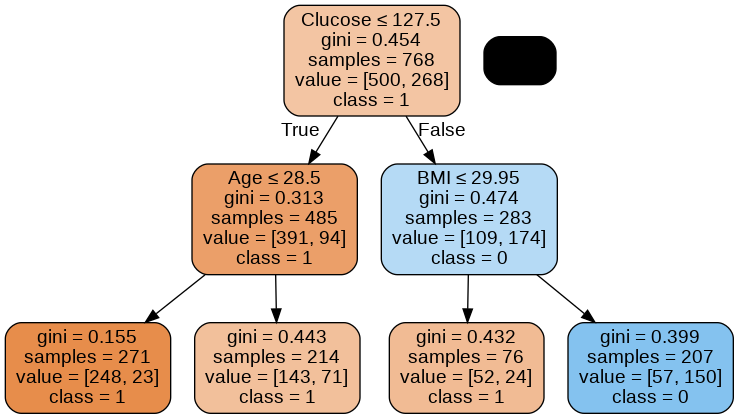

In [23]:
# leaf node의 최대 개수를 설정
clf = DecisionTreeClassifier(max_leaf_nodes = 4)
tree = clf.fit(X, y)
draw_decision_tree(tree, feature_cols, pima.Outcome.unique())

# 4. 사전 가지치기: GridSearch 이용

In [24]:
from sklearn.model_selection import GridSearchCV # 관심 있는 매개변수들을 대상으로 가능한 모든 조합을 시도하여 최적의 매개변수를 찾는 방법

# GridSearch는 확인하고 싶은 다양한 파라미터값을 넣어주면
# 그것들을 하나씩 확인하면서 스코어를 내고 가장 좋은 성능의 모델에 대한 결과를 확인하고 사용할 수 있음

In [26]:
# 테스트하고자 하는 파라미터 값들을 사전타입으로 정의
# max_depth 와 min_samples_split라는 parameter에 대해 범위를 임의로 지정
hyperparamters = {'max_depth': list(range(5, 10)),  'min_samples_split': list(range(5, 15))}

# GridSearch 진행
GridCV = GridSearchCV(estimator=tree_nottuned, param_grid=hyperparamters, cv=5, verbose=1)

GridCV.fit(X_train, y_train)
GridCV.best_params_ # 가장 좋은 성능을 보였을 때의 parameter

Fitting 5 folds for each of 50 candidates, totalling 250 fits


{'max_depth': 6, 'min_samples_split': 13}

In [27]:
tree_grid = DecisionTreeClassifier(max_depth=6, min_samples_split=13)

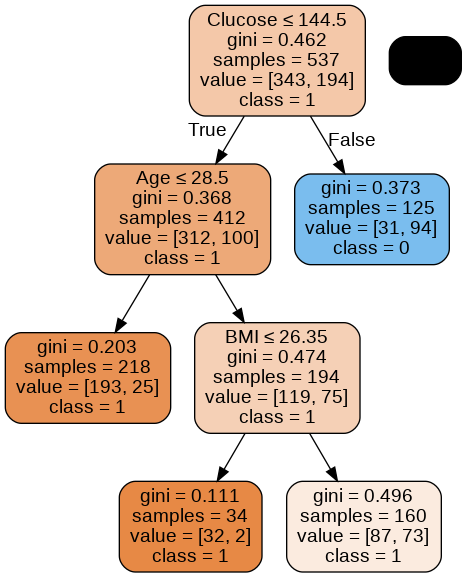

In [28]:
tree_grid = clf.fit(X_train,y_train)
draw_decision_tree(tree_grid, feature_cols, pima.Outcome.unique())

In [30]:
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7316017316017316


- 성능 향상: 0.7229437229437229 -> 0.7316017316017316

# 5. 사후 가지치기: Cost Complexity Pruning

In [31]:
import sklearn
import matplotlib.pyplot as plt

In [33]:
clf = DecisionTreeClassifier(random_state=0)

path = clf.cost_complexity_pruning_path(X_train, y_train)

# effective alphas, corresponding total leaf impurities 구하기
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [39]:
# # effective alpha 값에 대응하는 sub-trees 시각화 -> 용량 너무 커서 우선 주석 처리!

# clfs = []
# count = 0
# for ccp_alpha in ccp_alphas:
#     # 각 effective alphas 이용해 decision tree 만들기
#     clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
#     clf = clf.fit(X_train, y_train)
#     count += 1
#     print("Number of nodes in the {}th tree is: {} with ccp_alpha: {}".format(
#       count, clf.tree_.node_count, ccp_alpha))
#     display(draw_decision_tree(clf, feature_cols, pima.Outcome.unique()))
#     clfs.append(clf)
#     print("====================================================================================")

# # ccp_alpha = 0 일 때는 not-pruned full tree
# # ccp_alpha를 0부터 시작해서 크기를 늘려감, effective alpha를 지나면 가지치기
# # 마지막에는 root node만 남음
# # alpha에 따라서 subtree의 크기를 조정할 수 있음을 확인

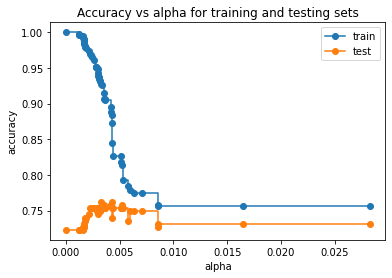

Decision tree without pruning : 203 nodes, 0.723 accuracy
Decision tree with the best pruning : 97 nodes, 0.762 accuracy


In [38]:
# testing accuracy를 높이는 최고의 ccp_alpha를 구해보자

train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

print("Decision tree without pruning : {0} nodes, {1:.3} accuracy".format(tree_nottuned.tree_.node_count, tree_nottuned.score(X_test, y_test)))
print("Decision tree with the best pruning : {0} nodes, {1:.3} accuracy".format(clfs[test_scores.index(max(test_scores))].tree_.node_count, max(test_scores)))

- 성능 향상: 0.723 -> 0.762